In [189]:
#Load Libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import pandas_ta as ta
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [190]:
url='https://www.alphavantage.co/query?function=DIGITAL_CURRENCY_DAILY&symbol=BTC&market=INR&apikey=D5OBBCW29ZBREHXC'
data = requests.get(url)\
        .json()['Time Series (Digital Currency Daily)']

df = pd.DataFrame.from_dict(data)
#data.splice(index, remove_count )
#dataset = pd.read_json(data, orient ='index')
#print(df.T)
dataset=df.T
#dataset=dataset[1:]
dataset.rename({'1a. open (INR)': 'open', '2a. high (INR)': 'high','3a. low (INR)' : 'low','4a. close (INR)' : 'close','5. volume':'volume' }, axis=1, inplace=True)
dataset = dataset.apply(pd.to_numeric)
dataset.tail()
len(dataset.index)
list(dataset['high'])
print(1*1e-5)

1e-05


In [191]:
#check for data with zero shares traded
index_Zeros = dataset[ dataset['volume'] == 0].index

dataset.drop(index_Zeros , inplace = True)
dataset.loc[(dataset['volume'] == 0)]
dataset.isna().sum()

open                   0
1b. open (USD)         0
high                   0
2b. high (USD)         0
low                    0
3b. low (USD)          0
close                  0
4b. close (USD)        0
volume                 0
6. market cap (USD)    0
dtype: int64

In [192]:
#dataset.ta.indicators() -- list of indicators in ta
#help(ta.atr) -- help
dataset['ATR'] = dataset.ta.atr(length=20)
dataset['RSI'] = dataset.ta.rsi()
dataset['Average'] = dataset.ta.midprice(length=1) #midprice
dataset['MA40'] = dataset.ta.sma(length=40)
dataset['MA80'] = dataset.ta.sma(length=80)
dataset['MA160'] = dataset.ta.sma(length=160)

from scipy.stats import linregress
def get_slope(array):
    y = np.array(array)
    x = np.arange(len(y))
    slope, intercept, r_value, p_value, std_err = linregress(x,y)
    return slope

#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
backrollingN = 6
#!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
dataset['slopeMA40'] = dataset['MA40'].rolling(window=backrollingN).apply(get_slope, raw=True)
dataset['slopeMA80'] = dataset['MA80'].rolling(window=backrollingN).apply(get_slope, raw=True)
dataset['slopeMA160'] = dataset['MA160'].rolling(window=backrollingN).apply(get_slope, raw=True)
dataset['AverageSlope'] = dataset['Average'].rolling(window=backrollingN).apply(get_slope, raw=True)
dataset['RSISlope'] = dataset['RSI'].rolling(window=backrollingN).apply(get_slope, raw=True)

In [193]:
dataset.tail(20)

,open,1b. open (USD),high,2b. high (USD),low,3b. low (USD),close,4b. close (USD),volume,6. market cap (USD),...,RSI,Average,MA40,MA80,MA160,slopeMA40,slopeMA80,slopeMA160,AverageSlope,RSISlope
2019-11-10,702620.1968,8809.18,729579.8744,9147.19,697900.0000,8750.00,720988.1272,9039.47,34422.029797,34422.029797,...,74.004253,713739.9372,608032.79286,621799.77763,629122.239145,2995.651717,-587.160077,895.936674,4979.029394,0.764980
2019-11-09,699793.5024,8773.74,708268.8000,8880.00,695896.4288,8724.88,702638.5416,8809.41,29469.481405,29469.481405,...,66.579258,702082.6144,611341.05820,621236.67203,630010.496355,3154.935286,-547.637572,902.835629,2731.666057,-0.540993
2019-11-08,734908.6400,9214.00,738657.3600,9261.00,693592.9600,8696.00,699792.7048,8773.73,62107.289243,62107.289243,...,65.481948,716125.1600,614323.88280,621103.23355,630843.883670,3237.333063,-468.316822,877.466109,3081.106011,-1.419295
2019-11-07,744891.4016,9339.16,747750.0000,9375.00,725895.7600,9101.00,735084.1120,9216.20,39117.470853,39117.470853,...,71.709000,736822.8800,619493.08852,621702.62995,632137.471230,3570.787404,-260.476220,922.587766,6389.562206,-0.768842
2019-11-06,742384.5448,9307.73,753006.9816,9440.91,737780.7976,9250.01,744882.6280,9339.05,37336.170372,37336.170372,...,73.156920,745393.8896,624373.06454,622698.10454,633368.940705,3929.312022,78.868112,1016.466710,8076.440629,0.244537
2019-11-05,749137.8240,9392.40,754126.8120,9454.95,731858.6176,9175.76,742458.7216,9308.66,45935.873665,45935.873665,...,72.172885,742992.7148,628740.06412,623565.15556,634600.609580,4222.902315,394.588102,1107.450651,8482.726674,0.480091
2019-11-04,733509.6496,9196.46,758811.1168,9513.68,727079.3984,9115.84,749213.5960,9393.35,45894.456277,45894.456277,...,73.252633,742945.2576,633384.68832,624551.01907,635841.655240,4524.190588,712.942166,1190.212618,8385.339714,1.568217
2019-11-03,740958.4360,9289.85,746758.5832,9362.57,723115.3264,9066.14,733370.0696,9194.71,27894.378279,27894.378279,...,66.713953,734936.9548,637245.53094,625061.83202,636997.118420,4590.001134,834.434592,1231.725562,3143.569486,0.280197
2019-11-02,736296.4640,9231.40,747649.5024,9373.74,732692.1096,9186.21,740932.1152,9289.52,28923.060828,28923.060828,...,68.174174,740170.8060,641415.86230,625613.66155,638208.772520,4367.882637,789.491541,1213.773864,-419.389474,-1.026379
2019-11-01,729074.9936,9140.86,740093.0400,9279.00,720232.8000,9030.00,736313.2136,9231.61,43594.814115,43594.814115,...,66.262096,730162.9200,645446.95264,626201.15377,639179.885415,4207.362219,690.616488,1172.419301,-2646.539349,-1.514541


In [194]:
#Target flexible way
pipdiff = 500*1e-5 #for TP
SLTPRatio = 2 #pipdiff/Ratio gives SL

def mytarget(barsupfront, df1):
    length = len(df1)
    high = list(df1['high'])
    low = list(df1['low'])
    close = list(df1['close'])
    open = list(df1['open'])
    trendcat = [None] * length
    
    for line in range (0,length-barsupfront-2):
        valueOpenLow = 0
        valueOpenHigh = 0
        for i in range(1,barsupfront+2):
            value1 = open[line+1]-low[line+i]
            value2 = open[line+1]-high[line+i]
            valueOpenLow = max(value1, valueOpenLow)
            valueOpenHigh = min(value2, valueOpenHigh)

            if ( (valueOpenLow >= pipdiff) and (-valueOpenHigh <= (pipdiff/SLTPRatio)) ):
                trendcat[line] = 1 #-1 downtrend
                break
            elif ( (valueOpenLow <= (pipdiff/SLTPRatio)) and (-valueOpenHigh >= pipdiff) ):
                trendcat[line] = 2 # uptrend
                break
            else:
                trendcat[line] = 0 # no clear trend
            
    return trendcat

In [195]:
# mytarget(barsfront to take into account, dataframe)
dataset['mytarget'] = mytarget(16, dataset)
dataset.head(20)

,open,1b. open (USD),high,2b. high (USD),low,3b. low (USD),close,4b. close (USD),volume,6. market cap (USD),...,Average,MA40,MA80,MA160,slopeMA40,slopeMA80,slopeMA160,AverageSlope,RSISlope,mytarget
2022-07-17,1.690561e+06,21195.60,1.702785e+06,21348.86,1.683654e+06,21109.00,1.687742e+06,21160.25,7384.63209,7384.63209,...,1.693219e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2022-07-16,1.661404e+06,20830.04,1.721934e+06,21588.94,1.633374e+06,20478.61,1.690561e+06,21195.60,121011.67393,121011.67393,...,1.677654e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2022-07-15,1.642166e+06,20588.84,1.690912e+06,21200.00,1.625691e+06,20382.29,1.661404e+06,20830.04,143343.30490,143343.30490,...,1.658302e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2022-07-14,1.613933e+06,20234.87,1.666984e+06,20900.00,1.564578e+06,19616.07,1.642166e+06,20588.84,174809.21696,174809.21696,...,1.615781e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2022-07-13,1.541863e+06,19331.28,1.624441e+06,20366.61,1.508337e+06,18910.94,1.613933e+06,20234.87,209250.24888,209250.24888,...,1.566389e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2022-07-12,1.592298e+06,19963.61,1.599939e+06,20059.42,1.534582e+06,19240.00,1.541661e+06,19328.75,139506.45862,139506.45862,...,1.567261e+06,NaN,NaN,NaN,NaN,NaN,NaN,-28745.982560,NaN,0.0
2022-07-11,1.663882e+06,20861.11,1.664470e+06,20868.48,1.585248e+06,19875.23,1.592298e+06,19963.61,137535.40724,137535.40724,...,1.624859e+06,NaN,NaN,NaN,NaN,NaN,NaN,-16756.812583,NaN,0.0
2022-07-10,1.722190e+06,21592.15,1.723426e+06,21607.65,1.647443e+06,20655.00,1.663991e+06,20862.47,192188.21556,192188.21556,...,1.685434e+06,NaN,NaN,NaN,NaN,NaN,NaN,4679.165977,NaN,0.0
2022-07-09,1.722397e+06,21594.75,1.753125e+06,21980.00,1.700652e+06,21322.12,1.722164e+06,21591.83,178417.84468,178417.84468,...,1.726889e+06,NaN,NaN,NaN,NaN,NaN,NaN,27722.114834,NaN,0.0
2022-07-08,1.724809e+06,21624.99,1.796783e+06,22527.37,1.690055e+06,21189.26,1.722397e+06,21594.75,403081.57349,403081.57349,...,1.743419e+06,NaN,NaN,NaN,NaN,NaN,NaN,40703.168777,NaN,0.0


C:\Users\krish\AppData\Local\Temp\ipykernel_6304\3181447827.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df_model.hist(ax = ax)


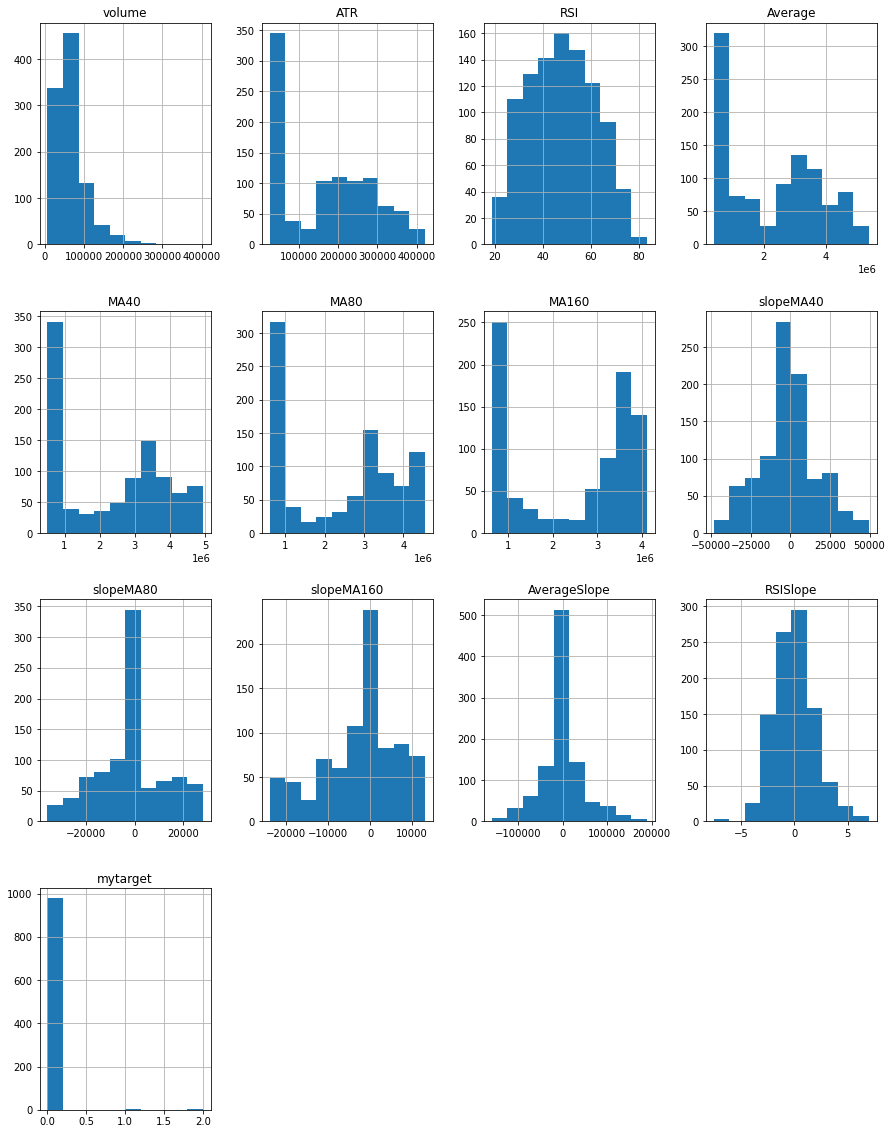

In [196]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df_model= dataset[['volume', 'ATR', 'RSI', 'Average', 'MA40', 'MA80', 'MA160', 'slopeMA40', 'slopeMA80', 'slopeMA160', 'AverageSlope', 'RSISlope', 'mytarget']] 
df_model.hist(ax = ax)
plt.show()

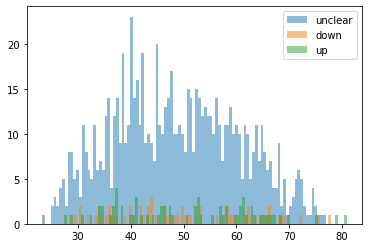

In [159]:
from matplotlib import pyplot
df_up=dataset.RSI[ dataset['mytarget'] == 2 ]
df_down=dataset.RSI[ dataset['mytarget'] == 1 ]
df_unclear=dataset.RSI[ dataset['mytarget'] == 0 ]
pyplot.hist(df_unclear, bins=100, alpha=0.5, label='unclear')
pyplot.hist(df_down, bins=100, alpha=0.5, label='down')
pyplot.hist(df_up, bins=100, alpha=0.5, label='up')

pyplot.legend(loc='upper right')
pyplot.show()